<a href="https://colab.research.google.com/github/shuvamadhikary6388-lang/ML/blob/main/Regression_VS_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGRESSION

RMSE: 0.746
R² Score: 0.576


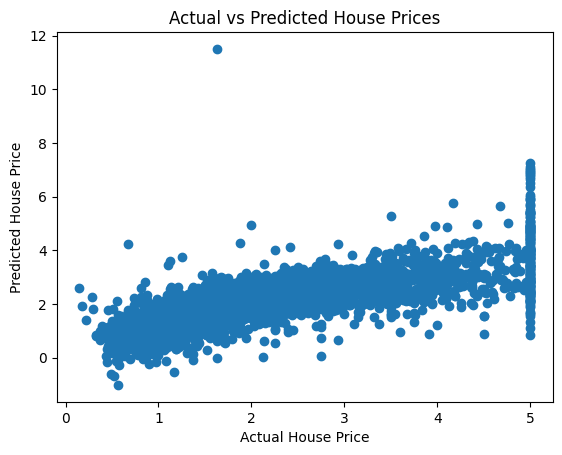

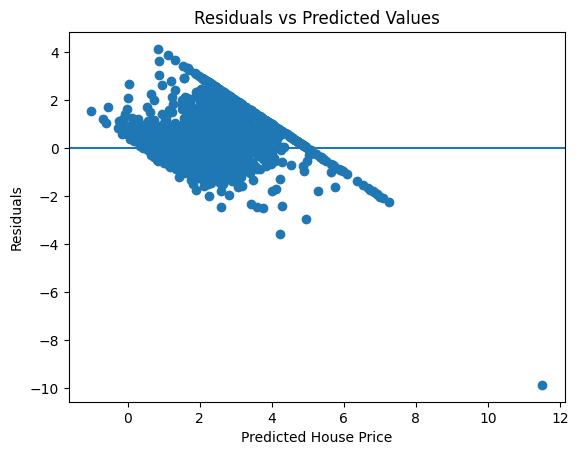

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X, y = fetch_california_housing(return_X_y=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted House Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


CLASSIFICATION

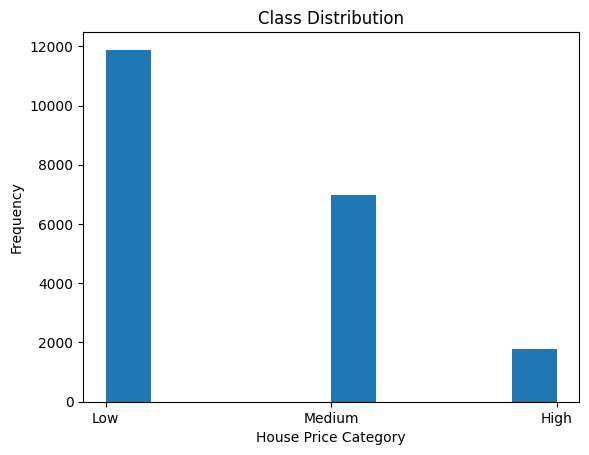

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CLASSIFICATION RESULTS
----------------------
Accuracy: 0.7594476744186046

Classification Report:

              precision    recall  f1-score   support

         Low       0.81      0.88      0.84      2414
      Medium       0.66      0.64      0.65      1371
        High       0.80      0.40      0.53       343

    accuracy                           0.76      4128
   macro avg       0.75      0.64      0.67      4128
weighted avg       0.76      0.76      0.75      4128



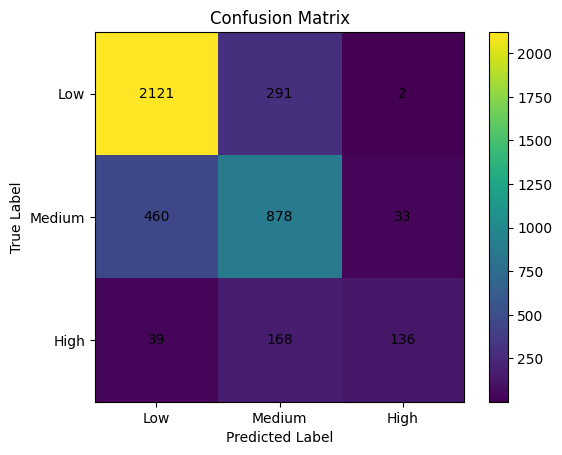

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X, y = fetch_california_housing(return_X_y=True)
y_class = np.where(y < 2, 0,
           np.where(y < 4, 1, 2))

plt.figure()
plt.hist(y_class)
plt.xticks([0, 1, 2], ["Low", "Medium", "High"])
plt.xlabel("House Price Category")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)


clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred,
      target_names=["Low", "Medium", "High"]))

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.colorbar()
plt.xticks([0, 1, 2], ["Low", "Medium", "High"])
plt.yticks([0, 1, 2], ["Low", "Medium", "High"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


In [2]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X, y = fetch_california_housing(return_X_y=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=100, random_state=42
    )
}

# Training & Evaluation
print("REGRESSION RESULTS")
print("=" * 60)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{name}")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  R² Score: {r2:.3f}")
    print("-" * 60)


REGRESSION RESULTS
Linear Regression
  RMSE: 0.746
  R² Score: 0.576
------------------------------------------------------------
Ridge Regression
  RMSE: 0.746
  R² Score: 0.576
------------------------------------------------------------
Lasso Regression
  RMSE: 0.738
  R² Score: 0.585
------------------------------------------------------------
Random Forest Regressor
  RMSE: 0.505
  R² Score: 0.805
------------------------------------------------------------


In [3]:
# =========================================
# MULTIPLE CLASSIFICATION TECHNIQUES
# California Housing Dataset
# =========================================

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Convert regression target into classes
# Low (<2), Medium (2–4), High (>4)
y_class = np.where(y < 2, 0,
           np.where(y < 4, 1, 2))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(
        n_estimators=100, random_state=42
    )
}

# Training & Evaluation
print("CLASSIFICATION RESULTS")
print("=" * 60)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    print(f"{name}")
    print(f"  Accuracy: {acc:.3f}")
    print("  Classification Report:")
    print(classification_report(
        y_test, y_pred,
        target_names=["Low", "Medium", "High"]
    ))
    print("-" * 60)


CLASSIFICATION RESULTS


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
  Accuracy: 0.759
  Classification Report:
              precision    recall  f1-score   support

         Low       0.81      0.88      0.84      2414
      Medium       0.66      0.64      0.65      1371
        High       0.80      0.40      0.53       343

    accuracy                           0.76      4128
   macro avg       0.75      0.64      0.67      4128
weighted avg       0.76      0.76      0.75      4128

------------------------------------------------------------
KNN Classifier
  Accuracy: 0.579
  Classification Report:
              precision    recall  f1-score   support

         Low       0.64      0.79      0.71      2414
      Medium       0.42      0.34      0.37      1371
        High       0.68      0.08      0.14       343

    accuracy                           0.58      4128
   macro avg       0.58      0.40      0.41      4128
weighted avg       0.57      0.58      0.55      4128

--------------------------------------------------------